In [105]:
import numpy as np
import pandas as pd

# Load Data

In [106]:
# load data
data = pd.read_csv('medical_cost_insurance.csv')

In [107]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [108]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

### Checking for missing data

In [109]:
# check missing data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Handling Outliers

<Axes: xlabel='age'>

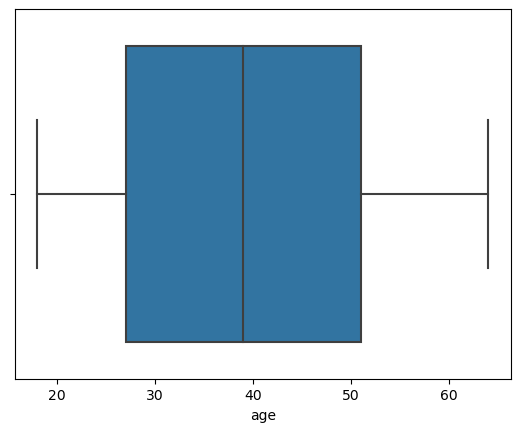

In [110]:
# draw box plot for age
import seaborn as sns
sns.boxplot(x=data['age'])

<Axes: xlabel='bmi'>

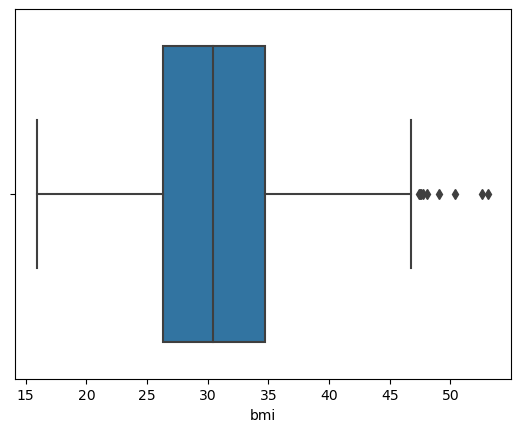

In [111]:
# draw box plot for bmi
sns.boxplot(x=data['bmi'])

In [112]:
# handle outliers in bmi using IQR method
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
data = data[(data['bmi'] >= lower_bound) & (data['bmi'] <= upper_bound)]

<Axes: xlabel='bmi'>

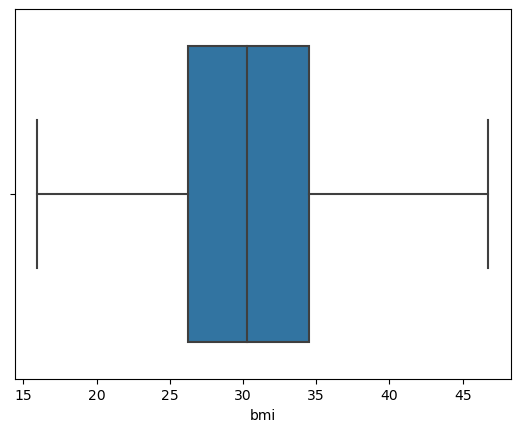

In [113]:
# draw box plot for bmi after handling outliers
sns.boxplot(x=data['bmi'])

<Axes: xlabel='children'>

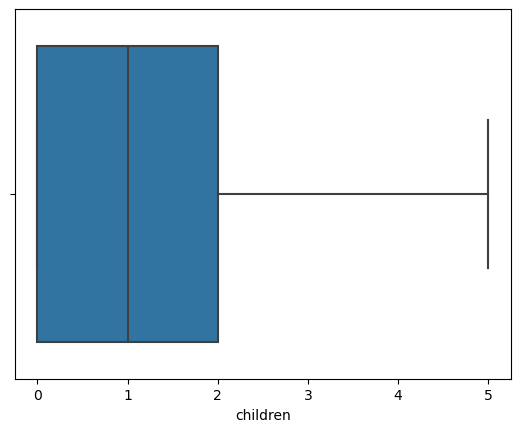

In [114]:
# draw box plot for children
sns.boxplot(x=data['children'])

### Feature Engineering

<BarContainer object of 2 artists>

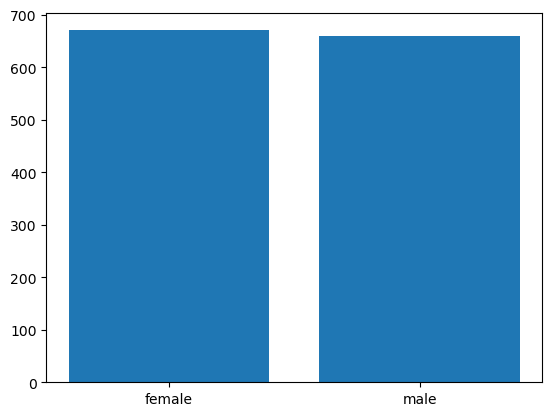

In [115]:
plt.bar(data['sex'].unique(), data['sex'].value_counts())


<BarContainer object of 2 artists>

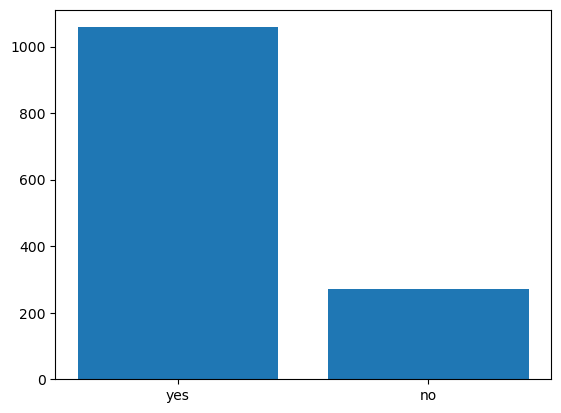

In [116]:
plt.bar(data['smoker'].unique(), data['smoker'].value_counts())

<BarContainer object of 4 artists>

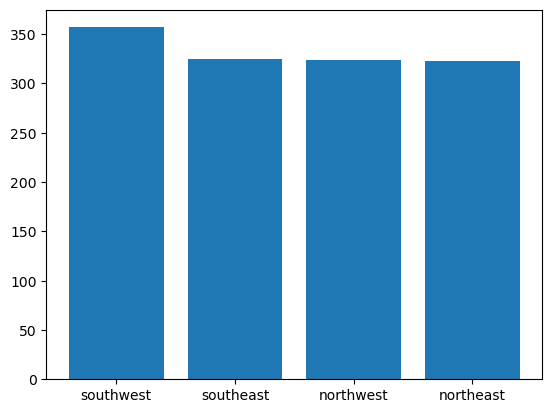

In [117]:
plt.bar(data['region'].unique(), data['region'].value_counts())

In [118]:
# feature engineering
# create a new feature called BMI_category
data['BMI_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100],
                               labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity class 1', 'Obesity class 2', 'Obesity class 3'])
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity class 1
2,28,male,33.000,3,no,southeast,4449.46200,Obesity class 1
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


<BarContainer object of 6 artists>

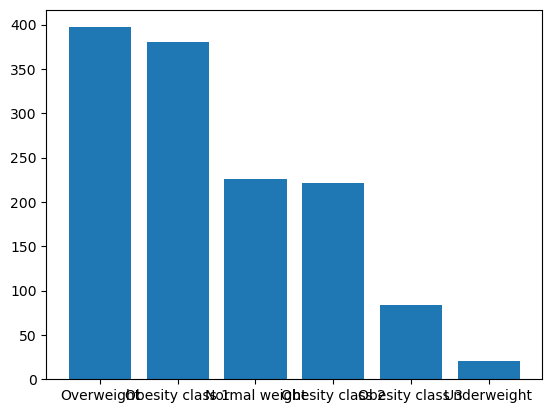

In [119]:
# draw barplot for bmi category
plt.bar(data['BMI_category'].unique(), data['BMI_category'].value_counts())

In [120]:
# drop bmi column
data = data.drop(columns=['bmi'])
data.head()

,age,sex,children,smoker,region,charges,BMI_category
0,19,female,0,yes,southwest,16884.92400,Overweight
1,18,male,1,no,southeast,1725.55230,Obesity class 1
2,28,male,3,no,southeast,4449.46200,Obesity class 1
3,33,male,0,no,northwest,21984.47061,Normal weight
4,32,male,0,no,northwest,3866.85520,Overweight


In [121]:
# info of age
data['age'].describe()

count    1329.000000
mean       39.203913
std        14.047835
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [122]:
# create new feature called age_category
data['age_category'] = pd.cut(data['age'], bins=[0, 18, 27, 39, 51, 64],
                               labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])
data.head()

,age,sex,children,smoker,region,charges,BMI_category,age_category
0,19,female,0,yes,southwest,16884.92400,Overweight,Young Adult
1,18,male,1,no,southeast,1725.55230,Obesity class 1,Teen
2,28,male,3,no,southeast,4449.46200,Obesity class 1,Adult
3,33,male,0,no,northwest,21984.47061,Normal weight,Adult
4,32,male,0,no,northwest,3866.85520,Overweight,Adult


<BarContainer object of 5 artists>

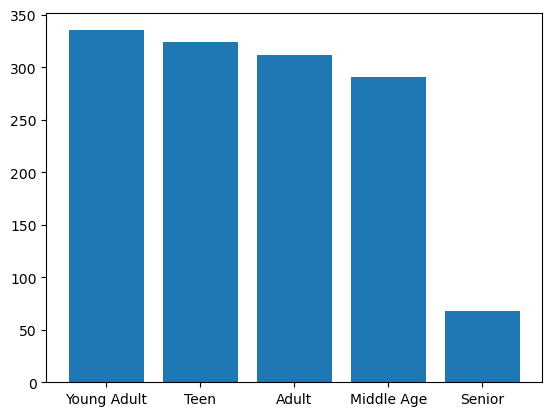

In [123]:
# draw barplot for age category
plt.bar(data['age_category'].unique(), data['age_category'].value_counts())

In [124]:
# drop age column
data = data.drop(columns=['age'])
data.head()

,sex,children,smoker,region,charges,BMI_category,age_category
0,female,0,yes,southwest,16884.92400,Overweight,Young Adult
1,male,1,no,southeast,1725.55230,Obesity class 1,Teen
2,male,3,no,southeast,4449.46200,Obesity class 1,Adult
3,male,0,no,northwest,21984.47061,Normal weight,Adult
4,male,0,no,northwest,3866.85520,Overweight,Adult


### Feature Encoding

In [125]:
# perform feature encoding on categorical variables using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode smoker region and sex ,bmi category , age category
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])
data['sex'] = le.fit_transform(data['sex'])
data['BMI_category']=le.fit_transform(data['BMI_category'])
data['age_category']=le.fit_transform(data['age_category'])

data.head()

,sex,children,smoker,region,charges,BMI_category,age_category
0,0,0,1,3,16884.92400,4,4
1,1,1,0,2,1725.55230,1,3
2,1,3,0,2,4449.46200,1,0
3,1,0,0,1,21984.47061,0,0
4,1,0,0,1,3866.85520,4,0


### Feature Scaling

In [126]:
# scale charges using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['charges'] = scaler.fit_transform(data['charges'].values.reshape(-1,1))
data.head()

,sex,children,smoker,region,charges,BMI_category,age_category
0,0,0,1,3,0.256431,4,4
1,1,1,0,2,0.009821,1,3
2,1,3,0,2,0.054133,1,0
3,1,0,0,1,0.339389,0,0
4,1,0,0,1,0.044655,4,0


### Check for multicollinearity

<Axes: >

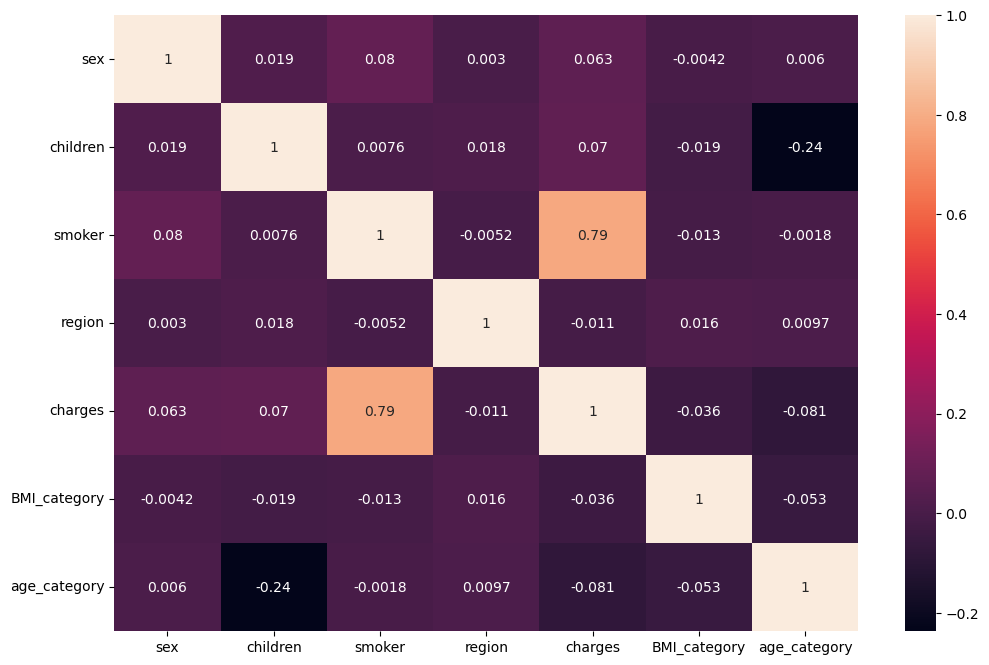

In [127]:
# draw correlation plot
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)


### Splitting dataset into Train and test

In [128]:
# split data into features and target
X = data.drop(columns=['charges'])
y = data['charges']

In [129]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1063, 6) (266, 6) (1063,) (266,)


# Model Training & Evaluation

### Linear Regression Model

In [130]:
# train linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [133]:
# check for overfitting
train_pred = lr_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2 = r2_score(y_train, train_pred)
print('RMSE for training data: ', train_rmse)
print('R2 Score for training data: ', train_r2)

RMSE for training data:  0.11924801400315656
R2 Score for training data:  0.6235641300438639


In [134]:
# do cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.62768134 0.60279966 0.59416251 0.65267247 0.5958525 ]
Mean CV Score:  0.6146336961938721


### Ridge Regression Model

In [135]:
# train ridge regression model
from sklearn.linear_model import Ridge
#use cross validation to find the best alpha
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-0.014461563099894192


In [136]:
# now train ridge model with best alpha
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [137]:
# check for overfitting
train_pred = ridge_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2 = r2_score(y_train, train_pred)
print('RMSE for training data: ', train_rmse)
print('R2 Score for training data: ', train_r2)

RMSE for training data:  0.11925125301434594
R2 Score for training data:  0.6235436802851976


In [138]:
# do cross validation
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.6275795  0.60295736 0.59488057 0.65159865 0.59640919]
Mean CV Score:  0.6146850540049555


### Lasso Regression Model

In [139]:
# lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.014459799338165708


In [140]:
# now train lasso model with best alpha
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [141]:
# check for overfitting
train_pred = lasso_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2 = r2_score(y_train, train_pred)
print('RMSE for training data: ', train_rmse)
print('R2 Score for training data: ', train_r2)

RMSE for training data:  0.1192943374614009
R2 Score for training data:  0.6232716103164224


In [142]:
# do cross validation
cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.62657496 0.60434086 0.59508527 0.65002259 0.59791916]
Mean CV Score:  0.6147885692131246


### Random Forest Model

In [143]:
# train random forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [144]:
# check for overfitting
train_pred = rf_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2 = r2_score(y_train, train_pred)
print('RMSE for training data: ', train_rmse)
print('R2 Score for training data: ', train_r2)

RMSE for training data:  0.048971947060812544
R2 Score for training data:  0.9365132006600686


In [145]:
# do cross validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.78346277 0.83646123 0.83893429 0.76764105 0.75806821]
Mean CV Score:  0.7969135088057623


### Gradient Boosting regressor Model

In [146]:
# train gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [147]:
# check for overfitting
train_pred = gb_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2 = r2_score(y_train, train_pred)
print('RMSE for training data: ', train_rmse)
print('R2 Score for training data: ', train_r2)

RMSE for training data:  0.06997125266864382
R2 Score for training data:  0.8703931402682008


In [148]:
# do cross validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.8512482  0.85450288 0.87479768 0.81738981 0.82187131]
Mean CV Score:  0.8439619748308068


# Hyperparameter Tuning

In [149]:
# perform hyperparameter tuning on random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                                scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)
print(rf_random.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

e:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "e:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "e:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramet

{'n_estimators': 1100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
-0.006911816019637948


In [150]:
# train random forest model with best hyperparameters
rf_model = RandomForestRegressor(n_estimators=1100, min_samples_split=10,
                                  min_samples_leaf=2, max_features='sqrt', max_depth=15)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1100)

In [151]:
# check for overfitting
train_pred = rf_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
train_r2 = r2_score(y_train, train_pred)
print('RMSE for training data: ', train_rmse)
print('R2 Score for training data: ', train_r2)

RMSE for training data:  0.07054079069496695
R2 Score for training data:  0.8682746573549469


# Saving Model

In [152]:
# save model
import joblib
joblib.dump(rf_model, 'medical_cost_insurance_model.pkl')

['medical_cost_insurance_model.pkl']